In [1]:
import pandas as pd
from yahoofinancials import YahooFinancials
import datetime
import pathlib

In [3]:
from __future__ import (absolute_import, division, print_function,
                        unicode_literals)

import datetime  # For datetime objects
import os.path  # To manage paths
import sys  # To find out the script name (in argv[0])

# Import the backtrader platform
import backtrader as bt

if __name__ == '__main__':
    # Create a cerebro entity
    cerebro = bt.Cerebro()

    datapath = str(pathlib.Path().absolute()) + "/AAPL.csv"

    # Create a Data Feed
    data = bt.feeds.YahooFinanceCSVData(
        dataname=datapath,
        # Do not pass values before this date
        fromdate=datetime.datetime(2000, 1, 1),
        # Do not pass values after this date
        todate=datetime.datetime(2000, 12, 31),
        reverse=False)

    # Add the Data Feed to Cerebro
    cerebro.adddata(data)

    # Set our desired cash start
    cerebro.broker.setcash(100000.0)

    # Print out the starting conditions
    print('Starting Portfolio Value: %.2f' % cerebro.broker.getvalue())

    # Run over everything
    cerebro.run()

    # Print out the final result
    print('Final Portfolio Value: %.2f' % cerebro.broker.getvalue())

Starting Portfolio Value: 100000.00
Final Portfolio Value: 100000.00


In [7]:
from __future__ import (absolute_import, division, print_function,
                        unicode_literals)

import datetime  # For datetime objects
import os.path  # To manage paths
import sys  # To find out the script name (in argv[0])

# Import the backtrader platform
import backtrader as bt


# Create a Stratey
class TestStrategy(bt.Strategy):

    def log(self, txt, dt=None):
        ''' Logging function for this strategy'''
        dt = dt or self.datas[0].datetime.date(0)
        print('%s, %s' % (dt.isoformat(), txt))

    def __init__(self):
        # Keep a reference to the "close" line in the data[0] dataseries
        self.dataclose = self.datas[0].close

    def next(self):
        # Simply log the closing price of the series from the reference
        self.log('Close, %.2f' % self.dataclose[0])


if __name__ == '__main__':
    # Create a cerebro entity
    cerebro = bt.Cerebro()

    # Add a strategy
    cerebro.addstrategy(TestStrategy)

    datapath = str(pathlib.Path().absolute()) + "/AAPL.csv"

    # Create a Data Feed
    data = bt.feeds.YahooFinanceCSVData(
        dataname=datapath,
        # Do not pass values before this date
        fromdate=datetime.datetime(2019, 3, 1),
        # Do not pass values before this date
        todate=datetime.datetime(2019, 12, 31),
        # Do not pass values after this date
        reverse=False)

    # Add the Data Feed to Cerebro
    cerebro.adddata(data)

    # Set our desired cash start
    cerebro.broker.setcash(100000.0)

    # Print out the starting conditions
    print('Starting Portfolio Value: %.2f' % cerebro.broker.getvalue())

    # Run over everything
    cerebro.run()

    # Print out the final result
    print('Final Portfolio Value: %.2f' % cerebro.broker.getvalue())

Starting Portfolio Value: 100000.00
2019-03-04, Close, 173.58
2019-03-05, Close, 173.26
2019-03-06, Close, 172.27
2019-03-07, Close, 170.27
2019-03-08, Close, 170.68
2019-03-11, Close, 176.59
2019-03-12, Close, 178.57
2019-03-13, Close, 179.36
2019-03-14, Close, 181.36
2019-03-15, Close, 183.72
2019-03-18, Close, 185.59
2019-03-19, Close, 184.12
2019-03-20, Close, 185.73
2019-03-21, Close, 192.57
2019-03-22, Close, 188.58
2019-03-25, Close, 186.30
2019-03-26, Close, 184.38
2019-03-27, Close, 186.03
2019-03-28, Close, 186.28
2019-03-29, Close, 187.50
2019-04-01, Close, 188.77
2019-04-02, Close, 191.51
2019-04-03, Close, 192.83
2019-04-04, Close, 193.16
2019-04-05, Close, 194.45
2019-04-08, Close, 197.51
2019-04-09, Close, 196.92
2019-04-10, Close, 198.03
2019-04-11, Close, 196.38
2019-04-12, Close, 196.30
2019-04-15, Close, 196.66
2019-04-16, Close, 196.68
2019-04-17, Close, 200.51
2019-04-18, Close, 201.23
2019-04-22, Close, 201.89
2019-04-23, Close, 204.80
2019-04-24, Close, 204.48
20

In [6]:
from __future__ import (absolute_import, division, print_function,
                        unicode_literals)

import datetime  # For datetime objects
import os.path  # To manage paths
import sys  # To find out the script name (in argv[0])

# Import the backtrader platform
import backtrader as bt


# Create a Stratey
class TestStrategy(bt.Strategy):

    def log(self, txt, dt=None):
        ''' Logging function fot this strategy'''
        dt = dt or self.datas[0].datetime.date(0)
        print('%s, %s' % (dt.isoformat(), txt))

    def __init__(self):
        # Keep a reference to the "close" line in the data[0] dataseries
        self.dataclose = self.datas[0].close

    def next(self):
        # Simply log the closing price of the series from the reference
        self.log('Close, %.2f' % self.dataclose[0])

        if self.dataclose[0] < self.dataclose[-1]:
            # current close less than previous close

            if self.dataclose[-1] < self.dataclose[-2]:
                # previous close less than the previous close

                # BUY, BUY, BUY!!! (with all possible default parameters)
                self.log('BUY CREATE, %.2f' % self.dataclose[0])
                self.buy()


if __name__ == '__main__':
    # Create a cerebro entity
    cerebro = bt.Cerebro()

    # Add a strategy
    cerebro.addstrategy(TestStrategy)

    datapath = str(pathlib.Path().absolute()) + "/AAPL.csv"

    # Create a Data Feed
    data = bt.feeds.YahooFinanceCSVData(
        dataname=datapath,
        # Do not pass values before this date
        fromdate=datetime.datetime(2019, 3, 1),
        # Do not pass values before this date
        todate=datetime.datetime(2019, 12, 31),
        # Do not pass values after this date
        reverse=False)

    # Add the Data Feed to Cerebro
    cerebro.adddata(data)

    # Set our desired cash start
    cerebro.broker.setcash(100000.0)

    # Print out the starting conditions
    print('Starting Portfolio Value: %.2f' % cerebro.broker.getvalue())

    # Run over everything
    cerebro.run()

    # Print out the final result
    print('Final Portfolio Value: %.2f' % cerebro.broker.getvalue())

Starting Portfolio Value: 100000.00
2019-03-04, Close, 173.58
2019-03-05, Close, 173.26
2019-03-05, BUY CREATE, 173.26
2019-03-06, Close, 172.27
2019-03-06, BUY CREATE, 172.27
2019-03-07, Close, 170.27
2019-03-07, BUY CREATE, 170.27
2019-03-08, Close, 170.68
2019-03-11, Close, 176.59
2019-03-12, Close, 178.57
2019-03-13, Close, 179.36
2019-03-14, Close, 181.36
2019-03-15, Close, 183.72
2019-03-18, Close, 185.59
2019-03-19, Close, 184.12
2019-03-20, Close, 185.73
2019-03-21, Close, 192.57
2019-03-22, Close, 188.58
2019-03-25, Close, 186.30
2019-03-25, BUY CREATE, 186.30
2019-03-26, Close, 184.38
2019-03-26, BUY CREATE, 184.38
2019-03-27, Close, 186.03
2019-03-28, Close, 186.28
2019-03-29, Close, 187.50
2019-04-01, Close, 188.77
2019-04-02, Close, 191.51
2019-04-03, Close, 192.83
2019-04-04, Close, 193.16
2019-04-05, Close, 194.45
2019-04-08, Close, 197.51
2019-04-09, Close, 196.92
2019-04-10, Close, 198.03
2019-04-11, Close, 196.38
2019-04-12, Close, 196.30
2019-04-12, BUY CREATE, 196.3

In [8]:
from __future__ import (absolute_import, division, print_function,
                        unicode_literals)

import datetime  # For datetime objects
import os.path  # To manage paths
import sys  # To find out the script name (in argv[0])

# Import the backtrader platform
import backtrader as bt


# Create a Stratey
class TestStrategy(bt.Strategy):

    def log(self, txt, dt=None):
        ''' Logging function fot this strategy'''
        dt = dt or self.datas[0].datetime.date(0)
        print('%s, %s' % (dt.isoformat(), txt))

    def __init__(self):
        # Keep a reference to the "close" line in the data[0] dataseries
        self.dataclose = self.datas[0].close

        # To keep track of pending orders
        self.order = None

    def notify_order(self, order):
        if order.status in [order.Submitted, order.Accepted]:
            # Buy/Sell order submitted/accepted to/by broker - Nothing to do
            return

        # Check if an order has been completed
        # Attention: broker could reject order if not enough cash
        if order.status in [order.Completed]:
            if order.isbuy():
                self.log('BUY EXECUTED, %.2f' % order.executed.price)
            elif order.issell():
                self.log('SELL EXECUTED, %.2f' % order.executed.price)

            self.bar_executed = len(self)

        elif order.status in [order.Canceled, order.Margin, order.Rejected]:
            self.log('Order Canceled/Margin/Rejected')

        # Write down: no pending order
        self.order = None

    def next(self):
        # Simply log the closing price of the series from the reference
        self.log('Close, %.2f' % self.dataclose[0])

        # Check if an order is pending ... if yes, we cannot send a 2nd one
        if self.order:
            return

        # Check if we are in the market
        if not self.position:

            # Not yet ... we MIGHT BUY if ...
            if self.dataclose[0] < self.dataclose[-1]:
                    # current close less than previous close

                    if self.dataclose[-1] < self.dataclose[-2]:
                        # previous close less than the previous close

                        # BUY, BUY, BUY!!! (with default parameters)
                        self.log('BUY CREATE, %.2f' % self.dataclose[0])

                        # Keep track of the created order to avoid a 2nd order
                        self.order = self.buy()

        else:

            # Already in the market ... we might sell
            if len(self) >= (self.bar_executed + 5):
                # SELL, SELL, SELL!!! (with all possible default parameters)
                self.log('SELL CREATE, %.2f' % self.dataclose[0])

                # Keep track of the created order to avoid a 2nd order
                self.order = self.sell()


if __name__ == '__main__':
    # Create a cerebro entity
    cerebro = bt.Cerebro()

    # Add a strategy
    cerebro.addstrategy(TestStrategy)

    datapath = str(pathlib.Path().absolute()) + "/AAPL.csv"
    
    # Create a Data Feed
    data = bt.feeds.YahooFinanceCSVData(
        dataname=datapath,
        # Do not pass values before this date
        fromdate=datetime.datetime(2019, 3, 1),
        # Do not pass values before this date
        todate=datetime.datetime(2020, 3, 1),
        # Do not pass values after this date
        reverse=False)

    # Add the Data Feed to Cerebro
    cerebro.adddata(data)

    # Set our desired cash start
    cerebro.broker.setcash(100000.0)

    # Print out the starting conditions
    print('Starting Portfolio Value: %.2f' % cerebro.broker.getvalue())

    # Run over everything
    cerebro.run()

    # Print out the final result
    print('Final Portfolio Value: %.2f' % cerebro.broker.getvalue())

Starting Portfolio Value: 100000.00
2019-03-04, Close, 173.58
2019-03-04, BUY CREATE, 173.58
2019-03-05, BUY EXECUTED, 173.67
2019-03-05, Close, 173.26
2019-03-06, Close, 172.27
2019-03-07, Close, 170.27
2019-03-08, Close, 170.68
2019-03-11, Close, 176.59
2019-03-12, Close, 178.57
2019-03-12, SELL CREATE, 178.57
2019-03-13, SELL EXECUTED, 179.90
2019-03-13, Close, 179.36
2019-03-14, Close, 181.36
2019-03-15, Close, 183.72
2019-03-18, Close, 185.59
2019-03-19, Close, 184.12
2019-03-20, Close, 185.73
2019-03-21, Close, 192.57
2019-03-22, Close, 188.58
2019-03-25, Close, 186.30
2019-03-25, BUY CREATE, 186.30
2019-03-26, BUY EXECUTED, 189.18
2019-03-26, Close, 184.38
2019-03-27, Close, 186.03
2019-03-28, Close, 186.28
2019-03-29, Close, 187.50
2019-04-01, Close, 188.77
2019-04-02, Close, 191.51
2019-04-02, SELL CREATE, 191.51
2019-04-03, SELL EXECUTED, 190.75
2019-04-03, Close, 192.83
2019-04-04, Close, 193.16
2019-04-05, Close, 194.45
2019-04-08, Close, 197.51
2019-04-09, Close, 196.92
20

In [16]:
from __future__ import (absolute_import, division, print_function,
                        unicode_literals)

import datetime  # For datetime objects
import os.path  # To manage paths
import sys  # To find out the script name (in argv[0])

# Import the backtrader platform
import backtrader as bt


# Create a Stratey
class TestStrategy(bt.Strategy):

    def log(self, txt, dt=None):
        ''' Logging function fot this strategy'''
        dt = dt or self.datas[0].datetime.date(0)
        print('%s, %s' % (dt.isoformat(), txt))

    def __init__(self):
        # Keep a reference to the "close" line in the data[0] dataseries
        self.dataclose = self.datas[0].close

        # To keep track of pending orders and buy price/commission
        self.order = None
        self.buyprice = None
        self.buycomm = None

    def notify_order(self, order):
        if order.status in [order.Submitted, order.Accepted]:
            # Buy/Sell order submitted/accepted to/by broker - Nothing to do
            return

        # Check if an order has been completed
        # Attention: broker could reject order if not enough cash
        if order.status in [order.Completed]:
            if order.isbuy():
                self.log(
                    'BUY EXECUTED, Price: %.2f, Cost: %.2f, Comm %.2f' %
                    (order.executed.price,
                     order.executed.value,
                     order.executed.comm))

                self.buyprice = order.executed.price
                self.buycomm = order.executed.comm
            else:  # Sell
                self.log('SELL EXECUTED, Price: %.2f, Cost: %.2f, Comm %.2f' %
                         (order.executed.price,
                          order.executed.value,
                          order.executed.comm))

            self.bar_executed = len(self)

        elif order.status in [order.Canceled, order.Margin, order.Rejected]:
            self.log('Order Canceled/Margin/Rejected')

        self.order = None

    def notify_trade(self, trade):
        if not trade.isclosed:
            return

        self.log('OPERATION PROFIT, GROSS %.2f, NET %.2f' %
                 (trade.pnl, trade.pnlcomm))

    def next(self):
        # Simply log the closing price of the series from the reference
        self.log('Close, %.2f' % self.dataclose[0])

        # Check if an order is pending ... if yes, we cannot send a 2nd one
        if self.order:
            return

        # Check if we are in the market
        if not self.position:

            # Not yet ... we MIGHT BUY if ...
            if self.dataclose[0] < self.dataclose[-1]:
                    # current close less than previous close

                    if self.dataclose[-1] < self.dataclose[-2]:
                        # previous close less than the previous close

                        # BUY, BUY, BUY!!! (with default parameters)
                        self.log('BUY CREATE, %.2f' % self.dataclose[0])

                        # Keep track of the created order to avoid a 2nd order
                        self.order = self.buy()

        else:

            # Already in the market ... we might sell
            if len(self) >= (self.bar_executed + 5):
                # SELL, SELL, SELL!!! (with all possible default parameters)
                self.log('SELL CREATE, %.2f' % self.dataclose[0])

                # Keep track of the created order to avoid a 2nd order
                self.order = self.sell()


if __name__ == '__main__':
    # Create a cerebro entity
    cerebro = bt.Cerebro()

    # Add a strategy
    cerebro.addstrategy(TestStrategy)

    datapath = str(pathlib.Path().absolute()) + "/AAPL.csv"

    # Create a Data Feed
    data = bt.feeds.YahooFinanceCSVData(
        dataname=datapath,
        # Do not pass values before this date
        fromdate=datetime.datetime(2019, 3, 1),
        # Do not pass values before this date
        todate=datetime.datetime(2020, 3, 1),
        # Do not pass values after this date
        reverse=False)

    # Add the Data Feed to Cerebro
    cerebro.adddata(data)

    # Set our desired cash start
    cerebro.broker.setcash(100000.0)

    # Set the commission - 0.1% ... divide by 100 to remove the %
    cerebro.broker.setcommission(commission=0.001)

    # Print out the starting conditions
    print('Starting Portfolio Value: %.2f' % cerebro.broker.getvalue())

    # Run over everything
    cerebro.run()

    # Print out the final result
    print('Final Portfolio Value: %.2f' % cerebro.broker.getvalue())

Starting Portfolio Value: 100000.00
2019-03-04, Close, 173.58
2019-03-04, BUY CREATE, 173.58
2019-03-05, BUY EXECUTED, Price: 173.67, Cost: 173.67, Comm 0.17
2019-03-05, Close, 173.26
2019-03-06, Close, 172.27
2019-03-07, Close, 170.27
2019-03-08, Close, 170.68
2019-03-11, Close, 176.59
2019-03-12, Close, 178.57
2019-03-12, SELL CREATE, 178.57
2019-03-13, SELL EXECUTED, Price: 179.90, Cost: 173.67, Comm 0.18
2019-03-13, OPERATION PROFIT, GROSS 6.23, NET 5.88
2019-03-13, Close, 179.36
2019-03-14, Close, 181.36
2019-03-15, Close, 183.72
2019-03-18, Close, 185.59
2019-03-19, Close, 184.12
2019-03-20, Close, 185.73
2019-03-21, Close, 192.57
2019-03-22, Close, 188.58
2019-03-25, Close, 186.30
2019-03-25, BUY CREATE, 186.30
2019-03-26, BUY EXECUTED, Price: 189.18, Cost: 189.18, Comm 0.19
2019-03-26, Close, 184.38
2019-03-27, Close, 186.03
2019-03-28, Close, 186.28
2019-03-29, Close, 187.50
2019-04-01, Close, 188.77
2019-04-02, Close, 191.51
2019-04-02, SELL CREATE, 191.51
2019-04-03, SELL EX

In [17]:
cerebro.plot()

[[<Figure size 640x480 with 4 Axes>]]

Trade Analysis Results:
               Total Open     Total Closed   Total Won      Total Lost     
               0              1              1              0              
               Strike Rate    Win Streak     Losing Streak  PnL Net        
               100.0          1              0              2262.0         
SQN: 0
Final Portfolio Value: $102262.0


<IPython.core.display.Javascript object>


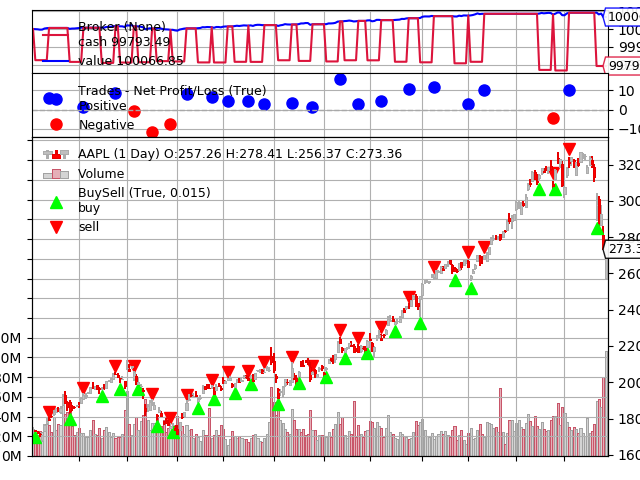

[[<Figure size 640x480 with 5 Axes>]]

In [12]:
'''
Author: www.backtest-rookies.com

MIT License

Copyright (c) 2017 backtest-rookies.com

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.
'''

import backtrader as bt
from datetime import datetime
from collections import OrderedDict

class firstStrategy(bt.Strategy):

    def __init__(self):
        self.rsi = bt.indicators.RSI_SMA(self.data.close, period=21)

    def next(self):
        if not self.position:
            if self.rsi < 30:
                self.buy(size=100)
        else:
            if self.rsi > 70:
                self.sell(size=100)


def printTradeAnalysis(analyzer):
    '''
    Function to print the Technical Analysis results in a nice format.
    '''
    #Get the results we are interested in
    total_open = analyzer.total.open
    total_closed = analyzer.total.closed
    total_won = analyzer.won.total
    total_lost = analyzer.lost.total
    win_streak = analyzer.streak.won.longest
    lose_streak = analyzer.streak.lost.longest
    pnl_net = round(analyzer.pnl.net.total,2)
    strike_rate = (total_won / total_closed) * 100
    #Designate the rows
    h1 = ['Total Open', 'Total Closed', 'Total Won', 'Total Lost']
    h2 = ['Strike Rate','Win Streak', 'Losing Streak', 'PnL Net']
    r1 = [total_open, total_closed,total_won,total_lost]
    r2 = [strike_rate, win_streak, lose_streak, pnl_net]
    #Check which set of headers is the longest.
    if len(h1) > len(h2):
        header_length = len(h1)
    else:
        header_length = len(h2)
    #Print the rows
    print_list = [h1,r1,h2,r2]
    row_format ="{:<15}" * (header_length + 1)
    print("Trade Analysis Results:")
    for row in print_list:
        print(row_format.format('',*row))

def printSQN(analyzer):
    sqn = round(analyzer.sqn,2)
    print('SQN: {}'.format(sqn))

#Variable for our starting cash
startcash = 100000

#Create an instance of cerebro
cerebro = bt.Cerebro()

#Add our strategy
cerebro.addstrategy(firstStrategy)

datapath = str(pathlib.Path().absolute()) + "/AAPL.csv"

# Create a Data Feed
data = bt.feeds.YahooFinanceCSVData(
    dataname=datapath,
    # Do not pass values before this date
    fromdate=datetime(2019, 3, 1),
    # Do not pass values before this date
    todate=datetime(2020, 3, 1),
    # Do not pass values after this date
    reverse=False)

#Add the data to Cerebro
cerebro.adddata(data)

# Set our desired cash start
cerebro.broker.setcash(startcash)

# Add the analyzers we are interested in
cerebro.addanalyzer(bt.analyzers.TradeAnalyzer, _name="ta")
cerebro.addanalyzer(bt.analyzers.SQN, _name="sqn")

# Run over everything
strategies = cerebro.run()
firstStrat = strategies[0]

# print the analyzers
printTradeAnalysis(firstStrat.analyzers.ta.get_analysis())
printSQN(firstStrat.analyzers.sqn.get_analysis())

#Get final portfolio Value
portvalue = cerebro.broker.getvalue()

#Print out the final result
print('Final Portfolio Value: ${}'.format(portvalue))

#Finally plot the end results
cerebro.plot(style='candlestick')